In [81]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [102]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from random import sample
import seaborn as sns
import matplotlib as plt

In [3]:
#sys.setrecursionlimit(100000)

In [83]:
irdf = pd.read_csv("Iris.csv")
irdf.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,39,4.4,3.0,1.3,0.2,Iris-setosa
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [84]:
irdf.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [59]:
irdf.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [60]:
irdf.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [85]:
# irdf.fillna(irdf.median,inplace=True)
median = irdf.median()
irdf.fillna(median, inplace = True)
# iris_data.isnull().sum()
irdf.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [62]:
irdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
irdf.shape

(152, 6)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [86]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
Y = irdf['Species']
lencoder.fit(Y)
#lencoder.classes_
irdf['Species'] = lencoder.fit_transform(Y)
#i1 = irdf[['Species']].apply(LabelEncoder().fit_transform)
irdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [87]:
irdf.corr()
# Since there is no independent variable with traget variable correlation value in the range of -0.1 to 0.1, 
# so, not dropping any independent variable

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [89]:
irdf.var()
# Since there is not such variable having almost zero (or <0.1) variance, not dropping any independent variable

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2F32B0>,
      dtype=object)

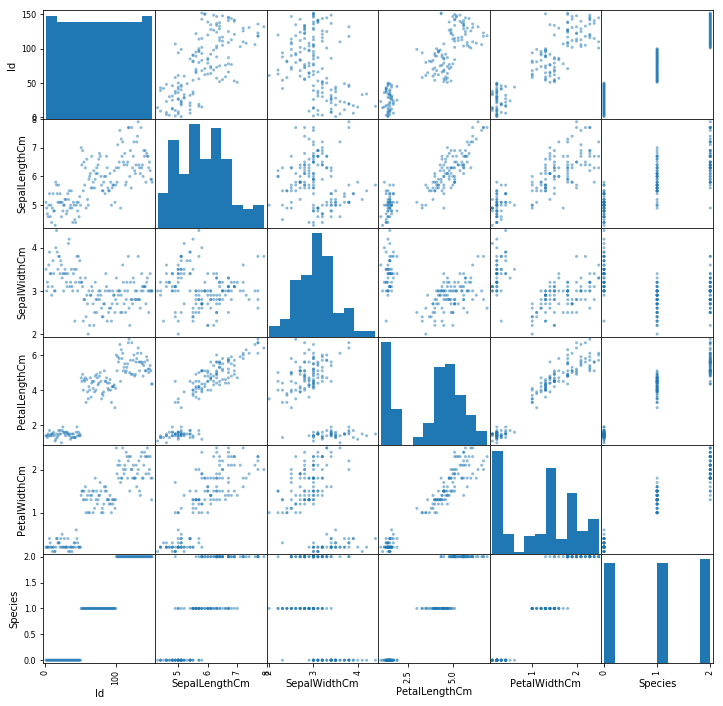

In [90]:
pd.plotting.scatter_matrix(irdf, figsize=[12,12])

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [91]:
X = irdf.drop('Species', axis = 1)
y = irdf.pop('Species')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [95]:
KNN_3 = KNeighborsClassifier(n_neighbors= 3, weights = 'uniform', metric='euclidean')
KNN_5 = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')
KNN_9 = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform', metric='euclidean')
# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [96]:
KNN_3.fit(X_train, y_train)
KNN_5.fit(X_train, y_train)
KNN_9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [98]:
pred_labels_3 = KNN_3.predict(X_test)
acc_3 = accuracy_score(y_test, pred_labels_3)
print('KNN_3 Accuracy Score: ', acc_3)

pred_labels_5 = KNN_5.predict(X_test)
acc_5 = accuracy_score(y_test, pred_labels_5)
print('KNN_5 Accuracy Score: ', acc_5)

pred_labels_9 = KNN_9.predict(X_test)
acc_9 = accuracy_score(y_test, pred_labels_9)
print('KNN_9 Accuracy Score: ', acc_9)

KNN_3 Accuracy Score:  1.0
KNN_5 Accuracy Score:  1.0
KNN_9 Accuracy Score:  0.967741935483871


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [104]:
k_vals = [1,3,5,7,9,11,13,15,17,19]
acc_score = [1,3,5,7,9,11,13,15,17,19]
mis_class_err = [1,3,5,7,9,11,13,15,17,19]
i = 0 
for k in k_vals:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'uniform', metric='euclidean')
    KNN.fit(X_train, y_train)
    pred_labels = KNN.predict(X_test)
    acc_score_temp = accuracy_score(y_test, pred_labels)
    acc_score[i] = acc_score_temp
    mis_class_err[i] = 1 - acc_score_temp
    i = i+ 1
    
j = 0
for k in k_vals:
    print('acc_score_k    : ', acc_score[j])
    print('mis_class_err_k: ', mis_class_err[j])
    j = j+1


acc_score_k    :  1.0
mis_class_err_k:  0.0
acc_score_k    :  1.0
mis_class_err_k:  0.0
acc_score_k    :  1.0
mis_class_err_k:  0.0
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004
acc_score_k    :  0.967741935483871
mis_class_err_k:  0.032258064516129004


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

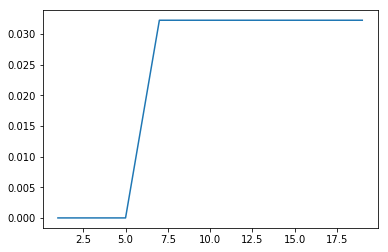

In [103]:
plt.pyplot.plot(k_vals, mis_class_err)